In [ ]:
!ls

'Olympics Database.csv'   sample_data


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df= pd.read_csv("Olympics Dataset.csv")

## 1. Cities where Summer Olympics held so far 

In [6]:
df['City'].unique()


array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [ ]:
len(df['City'].unique())

22

In [7]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


## 2. Which sport is having most no. of gold medals so far ?

In [8]:
goldmedals= df[df['Medal']=='Gold']

goldmedals

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold
...,...,...,...,...,...,...,...,...,...
31145,2012,London,Wrestling,Wrestling Freestyle,"NOROOZI, Omid Haji",IRI,Men,Wg 60 KG,Gold
31149,2012,London,Wrestling,Wrestling Freestyle,"KIM, Hyeonwoo",KOR,Men,Wg 66 KG,Gold
31153,2012,London,Wrestling,Wrestling Freestyle,"VLASOV, Roman",RUS,Men,Wg 74 KG,Gold
31157,2012,London,Wrestling,Wrestling Freestyle,"KHUGAEV, Alan",RUS,Men,Wg 84 KG,Gold


In [9]:
goldmedals.groupby('Sport').count()['Medal'].sort_values(ascending = False).head()

Sport
Aquatics      1421
Athletics     1215
Rowing         890
Gymnastics     820
Fencing        552
Name: Medal, dtype: int64

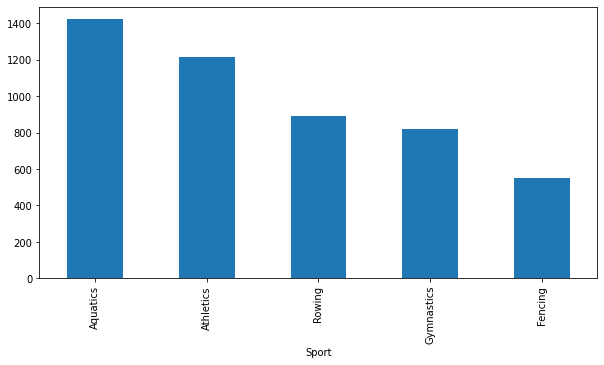

In [10]:
goldmedals.groupby('Sport').count()['Medal'].sort_values(ascending = False).head().plot.bar(figsize=(10,5))

## 3. Which sport has most no. of medals so far ?

In [11]:
df.groupby('Sport').count()['Medal'].sort_values(ascending = False).head()

Sport
Aquatics      4170
Athletics     3638
Rowing        2667
Gymnastics    2307
Fencing       1613
Name: Medal, dtype: int64

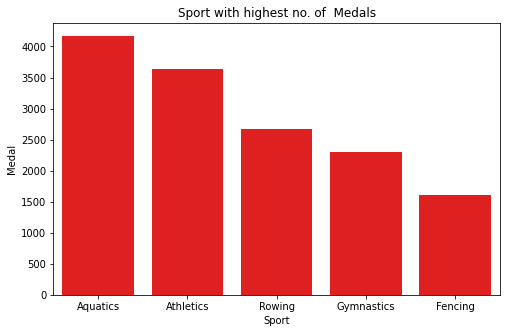

In [12]:
hgmedals =df.groupby('Sport').count()['Medal'].sort_values(ascending = False).head(5)
hgmedals
plt.figure(figsize=(8,5))
plt.title('Sport with highest no. of  Medals')
sns.barplot(x = hgmedals.index,y= hgmedals,color = 'red');

##4. Which player has won most number of medals? (Top 5)

In [15]:
hgp = df.groupby('Athlete').count()["Medal"].sort_values(ascending = False).head(6)
hgp

Athlete
PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
MANGIAROTTI, Edoardo    13
SHAKHLIN, Boris         13
ONO, Takashi            13
Name: Medal, dtype: int64

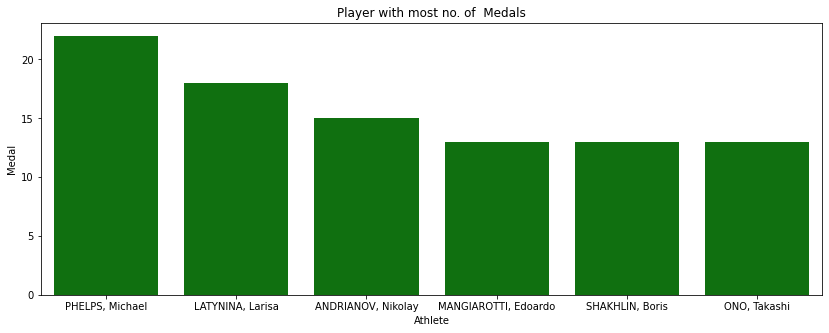

In [16]:
hgp
plt.figure(figsize=(14,5))
plt.title('Player with most no. of  Medals')
sns.barplot(x = hgp.index,y= hgp,color = 'green');

##5. Which player has won most number Gold Medals of medals? (Top 5)

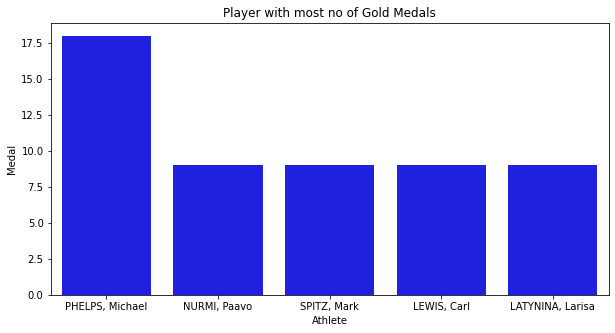

In [17]:
goldmedal = df[(df.Medal == 'Gold')]
goldmedal = goldmedal.groupby('Athlete').count()['Medal'].sort_values(ascending = False).head(5)
goldmedal
plt.figure(figsize=(10,5))
plt.title('Player with most no of Gold Medals')
sns.barplot(x = goldmedal.index,y= goldmedal,color = 'blue');

##6.In which year India won first Gold Medal in Summer Olympics?

In [ ]:
fst_medal = df[(df.Country == 'IND') & (df.Medal == 'Gold')]
year = fst_medal['Year'].head(1)
year


5512    1928
Name: Year, dtype: int64

##7. Which event is most popular in terms on number of players?

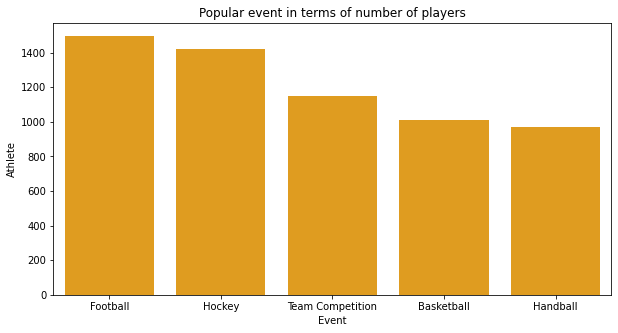

In [18]:
popeve = df.groupby('Event').count()['Athlete'].sort_values(ascending = False).head()
popeve
plt.figure(figsize=(10,5))
plt.title('Popular event in terms of number of players')
sns.barplot(x = popeve.index,y= popeve,color = 'orange');

##8. Which sport is having most female Gold Medalists? (Top 5)

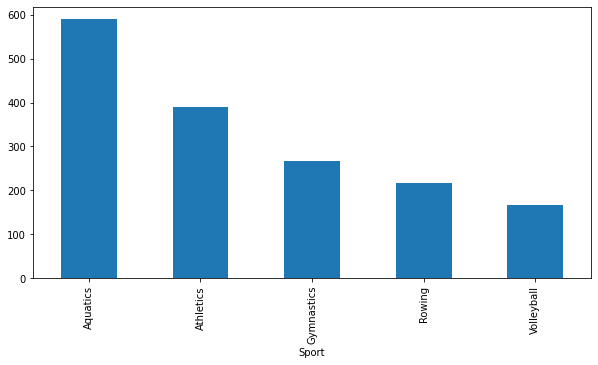

In [ ]:
fgm = df[(df.Gender == 'Women') & (df.Medal == 'Gold')]
fm = fgm.groupby('Sport').count()['Medal'].sort_values(ascending = False)
fm = fm.head()
fm.sort_values(ascending = False).plot.bar(figsize = (10,5))
